# Data Visualization with Plotly Demo

## Introduction to Jupyter Notebook
Jupyter Notebooks are a staple in any data scientist's toolkit. It is a free, open source, interactive data science environment that can function as both an IDE and a visualisation tool. A Jupyter Notebook is a single document where you can run code, display the output and add equations and explainations. Each notebook is a `.ipynb` file, which is a text file that describes the content of the notebook in JSON format.

Each Jupter Notebook contains a kernal that can be thought of as a "computational engine" that executes the code within the notebook. Notebooks are made up of a number of cells. For example, this piece of text you are reading resides in the first cell of this notebook. They can be markdown cells that display text in-place or code cells. When a code cell is run, the output is displayed below the cell. The order in which cells are run matters! Cells containing functions or variables have to be run before those same functions or variables can be called from a subsequent cell. 

How to use a Jupyter Notebook:
- To run a cell, either click the arrow to the left of the cell or press `ctrl + Enter` after selecting the cell. When a cell is run, a number will appear in square brackets (e.g. [1]) telling you the order in which each cell is run.
- To interrupt a cell while it is running, press the button with the black square in the toolbar at the top
- To restart the kernal, right-click `kernel` and choose from the list of restart options available


## Introduction to Plotly

Pandas is an open source library providing data structure and data analysis tools for the Python language. Plotly is another open source that allows you to put together high quality graphs to faciliate the visualisation of the data. Plotly Dash (written on top of Plotly.js and React.js) allows one to quickly build data apps that are rendered in the browser. 

This notebook contains examples of how each of these libraries can be leveraged to analyse and visualise data. For more information, please check out the official documentation listed below.

#### Further Documentation
https://pandas.pydata.org/docs/ \
https://plot.ly/python/ \
https://dash.plotly.com/introduction 

## Setting Up

You can install the libraries using pip or conda. 

**N.B.** you may have to restart the kernel after installing these packages for your first run.

In [ ]:
#!/bin/env python

# install packages
!pip3 install --user pandas
!pip3 install --user numpy
!pip3 install --user matplotlib
!pip3 install --user plotly
!pip3 install --user jupyter-dash

Having installed the libraries, you can import them as follows.

In [ ]:
# import libraries
%matplotlib inline

#import plotly
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State

# Set display row/column to show all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#!pip3 install --user plotly
#import plotly


## Access Data From Endpoint

#### Further Documentation
https://docs.python-requests.org/en/master/

**N.B.** the url used in this example is from the demo project we have set up. Please replace it with your own url.

In [ ]:
import os

In [ ]:
esg_keyw = []  # list to save the ESG Keywords from file
# https://www.delftstack.com/howto/python/python-readlines-without-newline/
with open("articles/ESG_Keywords.txt", "r") as file:
    esg_keyw=file.read().splitlines()[1:] # splitlines method splits lines into list without new line; excluding header with [1:]
    print(esg_keyw)

In [319]:
article1 = []  
# https://www.delftstack.com/howto/python/python-readlines-without-newline/
with open("articles/article1.txt", "r") as file:
    article1=file.read().splitlines() # splitlines method splits lines into list without new line; excluding header with [1:]
while("" in article1) :
    article1.remove("") # remove empty strings from list of strings 'article1'
    
    
art1_post = []

for i in range(len(article1)):
    myobj = {key: article1[i]}
    x = requests.post(url,  data = myobj)
    art1_post.append(x.json())

article1g = []  
# https://www.delftstack.com/howto/python/python-readlines-without-newline/
with open("articles/article1german.txt", "r") as file:
    article1g=file.read().splitlines() # splitlines method splits lines into list without new line
while("" in article1g) :
    article1g.remove("") # remove empty strings from list of strings 'article1g'
    
    
art1g_post = []

for i in range(len(article1g)):
    myobj = {key: article1g[i]}
    x = requests.post(url,  data = myobj)
    art1g_post.append(x.json())

In [ ]:
url = 'https://dbgee-mar22-12.ew.r.appspot.com/api/analyze'

article2 = []  
# https://www.delftstack.com/howto/python/python-readlines-without-newline/
with open("articles/article2.txt", "r") as file:
    article2=file.read().splitlines() # splitlines method splits lines into list without new line
while("" in article2) :
    article2.remove("") # remove empty strings from list of strings 'article2'
    
art2_post = []

for i in range(len(article2)):
    myobj = {key: article2[i]}
    x = requests.post(url,  data = myobj)
    art2_post.append(x.json())

In [33]:
# url = 'https://dbgee-mar22-12.ew.r.appspot.com/api/text'
url = 'https://dbgee-mar22-12.ew.r.appspot.com/api/analyze'

article3 = []  
# https://www.delftstack.com/howto/python/python-readlines-without-newline/
with open("articles/article3.txt", "r") as file:
    article3=file.read().splitlines() # splitlines method splits lines into list without new line
while("" in article3) :
    article3.remove("") # remove empty strings from list of strings 'article2'

art3_post = []

for i in range(len(article3)):
    myobj = {key: article3[i]}
    x = requests.post(url,  data = myobj)
    art3_post.append(x.json())

In [ ]:
art3_post

## Data Visualisation

Plotly is a commonly-used data visualisation library. The following examples will show you how to create different graphs from the sample data.

We can first read the sample data into a dataframe. The sample data is taken from the UK Met Office and shows the maximum and minimum temperature, the rainfall and the number of hours of sunlight for each month in 2018.

In [323]:
## question 2) Named Entity Extraction ##
entity_name=[]
entity_type = []
entity_score = []
entity_sentim = []

    #entity_dict.append([dict(zip(dict_keys,i)) for i in result])
    # entity_name.append(i["name"] for i in result)
entity_lst = []
entity_esg = []
    
for result in art3_post:
    for key in result.keys():
        entity_lst.append(result.get(key).get('entities'))
        entity_esg.append(result.get(key).get('entities_esg'))
    
# print(len(art3_post))
# print(entity_lst)
# print(entity_esg)

# [i for i in entity_lst]

# reduce to 1 a list of lists, flattening :
entity_lst_flat = [item for sublist in entity_lst for item in sublist]
entity_esg_flat = [item for sublist in entity_esg for item in sublist]

In [335]:
entity_esg_flat

[{'name': 'oversight',
  'entitytype': 'OTHER',
  'score': 0.10000000149011612,
  'sentiment': 'positive'},
 {'name': 'Data',
  'entitytype': 'OTHER',
  'score': 0.20000000298023224,
  'sentiment': 'positive'},
 {'name': 'Data',
  'entitytype': 'OTHER',
  'score': 0.10000000149011612,
  'sentiment': 'positive'},
 {'name': 'environment',
  'entitytype': 'OTHER',
  'score': 0.0,
  'sentiment': 'neutral'}]

In [125]:
#len(entity_lst_flat)
for i in range(0,len(entity_lst_flat)):
    entity_name.append([i["name"] for i in entity_lst_flat])
    entity_type.append([i["entitytype"] for i in entity_lst_flat])
    entity_score.append([i["score"] for i in entity_lst_flat])
    entity_sentim.append([i["sentiment"] for i in entity_lst_flat])

In [357]:
# entities that have a ESG match, unique list
entity_esg = [i["name"] for i in entity_esg_flat]
# list to dataframe
entity_esg = pd.DataFrame(list(zip(entity_esg)),  columns = ["entity"])
# drop duplicates for unique list:
entity_esg = entity_esg.drop_duplicates()

In [126]:
# reduce to 1 a list of lists, flattening :
entity_name = [item for sublist in entity_name for item in sublist]
entity_type = [item for sublist in entity_type for item in sublist]
entity_score = [item for sublist in entity_score for item in sublist]
entity_sentim = [item for sublist in entity_sentim for item in sublist]

In [130]:
entity_df = pd.DataFrame(list(zip(entity_name, entity_type, entity_score,entity_sentim)),  columns = ["entity","type","score","sentiment"])

In [133]:
# number of duplicates for each entry, reducing df to unique df:
entity_df_count = entity_df.groupby(entity_df.columns.tolist(),as_index=False).size()

In [134]:
# sort values by score
most_scored = entity_df_count.sort_values(by=['score'],  ascending=False)
# sort values by # repetitions
# entity_df_count.sort_values(by=['size'],  ascending=False)
# no many duplicates

In [ ]:
most_scored

In [ ]:
entity_df.groupby(['type', 'entity']).size().reset_index(name='obs')
#.sort_values(['obs'],ascending=False)
#.sort_values(['count'], ascending=False).head(5)

In [ ]:

ent_all_stats = entity_df.groupby(['type', 'entity','sentiment']).size().reset_index(name='obs')
ent_tot = entity_df.groupby(['type', 'entity']).size().groupby(level=1).max().sort_values(ascending=False).reset_index(name='Frequency')
#entity_df.groupby(['entity','sentiment']).size()
sentim_tot = entity_df.groupby(['sentiment']).size().reset_index(name='obs')

In [222]:
print(sentim_tot)
print()
print('Total Obvs: ' , sentim_tot['obs'].sum())

  sentiment    obs
0   neutral  13680
1  positive   9424

Total Obvs:  23104


In [201]:
## Percentage String Function
def percentage(part, whole):
    percentage = round(100 * float(part)/float(whole),2)
    return str(percentage) + "%"

In [219]:
if 'neutral' in sentim_tot['sentiment'].values:
    print('Neutral Sentiment: ' + percentage(sentim_tot[sentim_tot['sentiment'] == 'neutral']['obs'],sentim_tot['obs'].sum()))
else:
    print('Neutral Sentiment: 0%')
if 'positive' in sentim_tot['sentiment'].values:
    print('Positive Sentiment: ' +  percentage(sentim_tot[sentim_tot['sentiment'] == 'positive']['obs'],sentim_tot['obs'].sum()))
else:
    print('Positive Sentiment: 0%')
if 'negative' in sentim_tot['sentiment'].values:
    print('Negative Sentiment: ' + percentage(sentim_tot[sentim_tot['sentiment'] == 'negative']['obs'],sentim_tot['obs'].sum()))
else:
    print('Negative Sentiment: 0%')

Neutral Sentiment: 59.21%
Positive Sentiment: 40.79%
Negative Sentiment: 0%


In [ ]:
# getting only the entities:
entity_name_df = pd.DataFrame(list(zip(entity_name_flat)), columns=["entity"])
# descending order by number of repetitions:
entity_name_df_sorted = entity_name_df.groupby(entity_name_df.columns.tolist(),as_index=False).size().sort_values(by=['size'],  ascending=False)
entity_name_df_sorted.rename(columns = {'entity':'Entity', 'size':'Frequency'}, inplace = True)

In [ ]:
# getting only the entities - Ariicle 2:
entity_name_flat2 =  [item for sublist in entity_name2 for item in sublist]
entity_name_df2 = pd.DataFrame(list(zip(entity_name_flat2)), columns=["entity"])
# descending order by number of repetitions:
entity_name_df_sorted2 = entity_name_df2.groupby(entity_name_df2.columns.tolist(),as_index=False).size().sort_values(by=['size'],  ascending=False)
entity_name_df_sorted2.rename(columns = {'entity':'Entity', 'size':'Frequency'}, inplace = True)

In [ ]:
# entity name sorted greater than 1 = more than 1 appearance/repetition
ens_gt1 = entity_name_df_sorted[entity_name_df_sorted['Frequency']>1]
ens_gt2 = entity_name_df_sorted2[entity_name_df_sorted2['Frequency']>1]

In [234]:
#ent_tot
ent_tot.rename(columns = {'entity':'Entity'}, inplace = True)

In [239]:
# For Stats: Describe 'Frequency' column for Entities
ent_tot.describe()

,Frequency
count,99.000000
mean,227.232323
std,216.461847
min,152.000000
25%,152.000000
50%,152.000000
75%,152.000000
max,1520.000000


In [360]:
esg_matches = pd.merge(ent_all_stats, entity_esg, how='inner', on = 'entity')

In [361]:
esg_matches

,type,entity,sentiment,obs
0,OTHER,Data,positive,304
1,OTHER,environment,neutral,152
2,OTHER,oversight,positive,152


In [371]:
#pip install plotnine
from plotnine import ggplot, aes, geom_line,geom_bar, theme, element_text, ggtitle, geom_text, after_stat

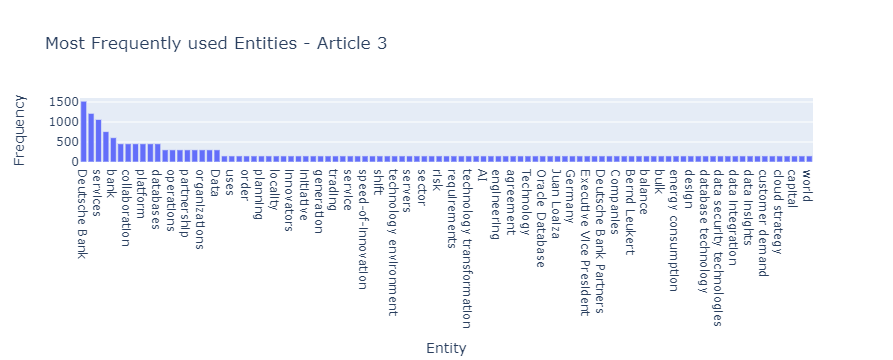

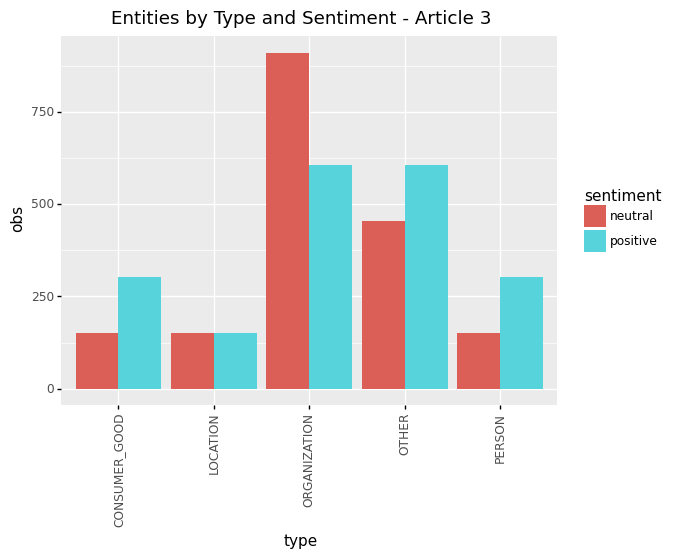

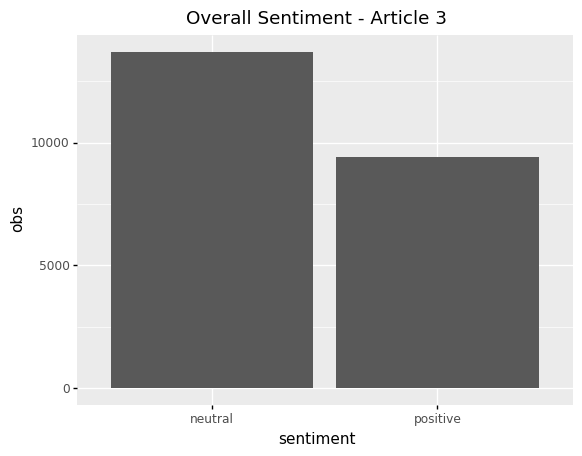

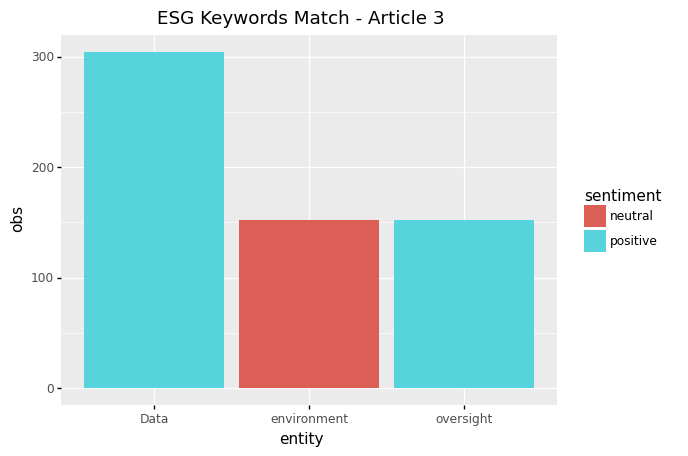

In [374]:
# Named entity extraction – table of most important/frequently used entities referenced.
px.bar(ent_tot, x='Entity', y='Frequency', title= "Most Frequently used Entities - Article 3").show()
#px.bar(ens_gt2, x='Entity', y='Frequency', title= "Most Frequently used Entities - Article 2").show()
# gg1 = ggplot(ent_tot, aes(x='Entity', y='Frequency')) + ggtitle("Most Frequently used Entities - Article 3")
# print(gg1)
print()

# Entity All Stats
# Entities grouped by Type and Sentiment
gg2 = ggplot(ent_all_stats, aes(x='type', y = "obs" ,fill = 'sentiment'))+ geom_bar(stat="identity",position="dodge") + theme(axis_text_x=element_text(angle=90)) + ggtitle("Entities by Type and Sentiment - Article 3")
print(gg2)
print()

# Sentiment Analysis
gg3 = ggplot(sentim_tot, aes(x='sentiment', y='obs')) + geom_bar(stat="identity",position="dodge") + ggtitle("Overall Sentiment - Article 3")
print(gg3)       

# ESG Matches
gg4 = ggplot(esg_matches, aes(x='entity', y ='obs' ,fill = 'sentiment')) + geom_bar(stat="identity",position="dodge") + ggtitle("ESG Keywords Match - Article 3")
print(gg4)

In [240]:
sentim_tot

,sentiment,obs
0,neutral,13680
1,positive,9424


To gain more insight into a particular column, you can use the *describe()* method on the dataframe column name.

## Introducing Jupyter Dash

Dash is Plotly's open source Python framework for building full stack analytic web applications using pure Python. The JupyterDash library makes these features available from the jupyter notebook.

In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')

In [287]:
### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

In [295]:
import plotly.graph_objs as go

In [ ]:
ent_tot

In [302]:
mgr_options = ent_tot["Entity"].unique()

In [303]:
app = dash.Dash()

app.layout = html.Div([
    html.H2("Sales Funnel Report"),
    html.Div(
        [
            dcc.Dropdown(
                id="Entity",
                options=[{
                    'label': i,
                    'value': i
                } for i in mgr_options],
                value='All Entities'),
        ],
        style={'width': '25%',
               'display': 'inline-block'}),
    dcc.Graph(id='funnel-graph'),
])

In [ ]:
@app.callback(
    # dash.dependencies.Output('funnel-graph', 'figure'),
    # dash.dependencies.Input('Manager', 'value'))
    Output(component_id='funnel-graph', component_property='children'),
    Input(component_id='Manager', component_property='value')
)
def update_output_div(input_value):
    return 'Output: {}'.format(input_value)
#app.run_server(mode="external", port=8050)
if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
# get ID of the most recent 
last_text_id = list(ent_tot.keys())[0]

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    
    
    # THESE LINES DISPLAY THE OUTPUT OF NLP API
    html.P("Most Recent Text ID: {}".format(last_text_id)),
    html.P("Text Analysed: {}".format(ent_tot[last_text_id]["entity"])),
    html.P("Sentiment: {}".format(ent_tot[last_text_id]["sentiment"])),
  
    # THESE LINES DEMO ONE OF THE DASH CORE COMPONENT(dcc) i.e. dcc.Input
    html.H3("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),
    
    # THESE LINES DEMO THE INTEGRATION OF PLOTLY GRAPHS WITH DASH
    dcc.Graph(figure=subplots_fig),

])


@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return 'Output: {}'.format(input_value)


In [ ]:
app.run_server(mode="external", port=8050)

#### In case the below cell has errors, please rerun it

In [ ]:
### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"